In [5]:
from bellman_ford.bellman_ford import bf_negative_cycle
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import time

In [6]:
def plot_grapg(grafo, title):
    pos = nx.spring_layout(grafo,k=8)

    nx.draw(grafo, pos, with_labels=True)
    nx.draw_networkx_edge_labels(grafo,
                                 pos,
                                 edge_labels={(u, v): d for u, v, d in grafo.edges(data="weight")},
                                 label_pos=.66)    
    plt.title(title)    
    plt.show()
    
    
def get_data_sol_seg_param(Grafo, node_ini=None, distance_ini=np.inf):
    """
    Recibe un grafo para analizar el comportamiento del método de bellman ford en su procesamiento
    :param: grafo
    :return: tablas reultado y gráficas, y parámetros a comparar
    """
    # Aplicando método Bellman ford modificado para monioreo de parámetros
    start_time = time.time()
    c,lv,p = bf_negative_cycle(Grafo, node_ini, distance_ini)
    time_exec = (time.time() - start_time)
    
    # Minim spanning tree
    print('Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: \n\n', p ,'\n\n')
    # Iteraciones, relajación de datos 
    print('Relajaciones, número de iteraciones: ',len(lv))
    # Solución
    print('Solución: ', c)
    # Relajaciones
    arr = np.array(lv)
    m = np.asmatrix(arr)
    print('Relajaciones realizadas: \n\n',m,'\n\n')
    # Separando datos a graficar
    act = np.array(m[:,0])
    ant = np.array(m[:,1])
    ni = map(str, np.array(m[:,2]).flatten().tolist())
    #print(ni)
    nf = map(str, np.array(m[:,3]).flatten().tolist())
    nodes_rel = np.array([','.join(p) for p in zip(ni, nf)])
    #print(nodes_rel)
    
    relajacion_graph(ant,act,nodes_rel)
    relajacion_global(ant,act)
    actualizacion_ruta(np.array(m[:,2]),np.array(m[:,3]))   
    
    return time_exec

def relajacion_graph(ant,act,nodes_rel):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    
    # Nodos
    x = list(range(1, len(nodes_rel)))
    y2 = act
    y1 = ant

    x = range(100)
    y = range(100,200)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_title('Relajación de datos')
    ax1.set_xlabel('Edges')
    ax1.set_ylabel('Relajación de datos')

    ax1.scatter(nodes_rel, y1, s=10, c='b', marker="s", label='Valor inicial')
    ax1.scatter(nodes_rel, y2, s=10, c='r', marker="o", label='Valor actualizado')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation = 90) 
    plt.show()
    
def relajacion_global(ant,act):
    """
    Gráfica el comportamiento de las relajaciones
    :param: columnas de las iteraciones de reñajamiento
    :return: gráfica del comportamiento de relajaciones
    """
    y2 = act
    y1 = ant
    plt.plot(y1, y2)
 
    # naming the x axis
    plt.xlabel('Valor Inicial')
    # naming the y axis
    plt.ylabel('Valor Actuakizado')

    plt.title('Actualización de datos (relajación global)')

    # function to show the plot
    plt.show()
    
def actualizacion_ruta(x,y):
    plt.plot(x, y)

    # naming the x axis
    plt.xlabel('Nodo origen')
    # naming the y axis
    plt.ylabel('Nodo destino')

    # giving a title to my graph
    plt.title('Actualización de la ruta')

    # function to show the plot
    plt.show()   
    
def compare_complex(x, complejidad, tiempo):
    """
    Gráfica el comportamiento tiempo de ejecución corriendo el método de bellman ford 
    y complejidad de los grafos
    :param: número de nodos del grafo, coplejidad de cada grafo, tiempo de ejecución bellman ford
    :return: gráfica del comportamiento
    """
    print(x)
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    g1, = ax1.plot(x, tiempo)
    ax1.set_ylabel('Tiempo')
    ax1.set_title("Tiempo ejecución Bellman Ford vs Complejidad")
    ax1.set_xlabel('Nodos')

    ax2 = ax1.twinx()  # this is the important function
    g2, = ax2.plot(x, complejidad, 'r')
    ax2.set_xlim([0, np.e])
    ax2.set_ylabel('Complejidad')
    
    plt.legend([g1, g2],["Tiempo", "Complejidad"])
    plt.xticks(range(1, 15))
    plt.xlabel("Número de Nodos", fontsize=12)

    plt.show()

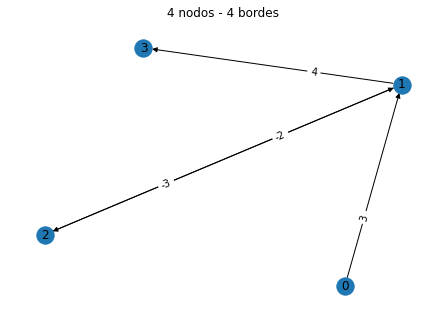

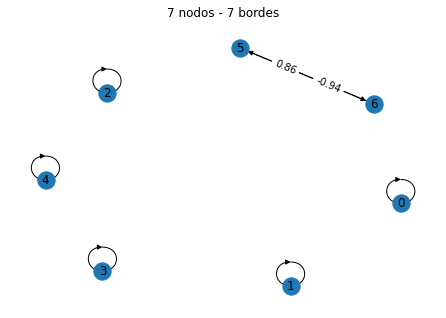

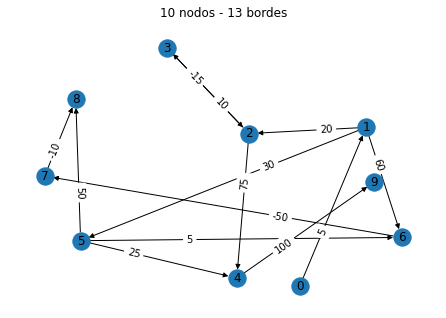

In [7]:
edges1 = [["0","1", 3],
         ["1","2", -2],
         ["2","1", -3],
         ["1","3", 4]]
     
G1 = nx.DiGraph()        
G1.add_weighted_edges_from(edges1)

plot_grapg(G1,'4 nodos - 4 bordes')

edges2 = [["5","6", 0.86],
         ["6","5", -0.94],
         ["3","3",0],
         ["0","0",0],
         ["1","1",0],
         ["2","2",0],
         ["4","4",0]]
        
G2 = nx.DiGraph()        
G2.add_weighted_edges_from(edges2)

plot_grapg(G2,'7 nodos - 7 bordes')

edges3 = [["0","1", 5],
         ["1","2", 20],
         ["1","5", 30],
         ["1","6", 60],
         ["2","3", 10],
         ["2","4", 75],
         ["3","2", -15],
         ["4","9", 100],
         ["5","4", 25],
         ["5","6", 5],
         ["5","8", 50],
         ["6","7", -50],
         ["7","8", -10]]
        
G3 = nx.DiGraph()        
G3.add_weighted_edges_from(edges3)

plot_grapg(G3,'10 nodos - 13 bordes')




 Grafo 1 


Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[  0.  inf  -1.   0.]
 [  0.  inf  -1.   1.]
 [  0.  inf  -1.   2.]
 [  0.  inf  -1.   3.]
 [ -2.   0.   4.   2.]
 [ -5.   0.   4.   1.]
 [ -7.  -2.   1.   2.]
 [ -1.   0.   4.   3.]
 [-10.  -5.   2.   1.]
 [-12.  -7.   1.   2.]
 [ -6.  -1.   1.   3.]
 [-15. -10.   2.   1.]
 [-17. -12.   1.   2.]
 [-11.  -6.   1.   3.]
 [-20. -15.   2.   1.]] 




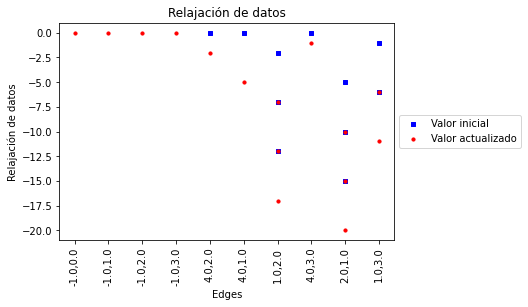

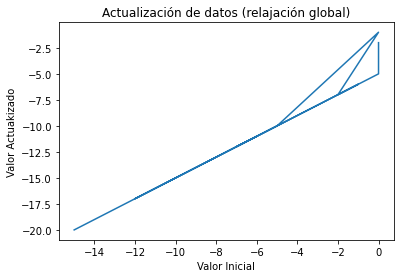

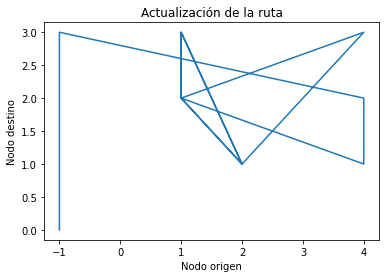




 Grafo 2 


Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  20
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.     inf -1.    0.  ]
 [ 0.     inf -1.    1.  ]
 [ 0.     inf -1.    2.  ]
 [ 0.     inf -1.    3.  ]
 [ 0.     inf -1.    4.  ]
 [ 0.     inf -1.    5.  ]
 [ 0.     inf -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]] 




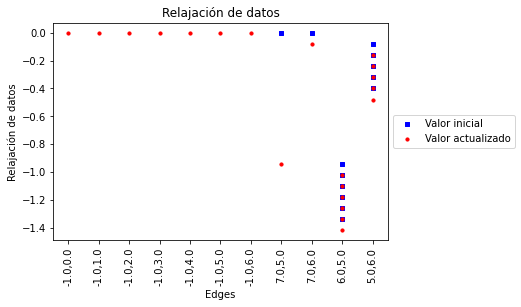

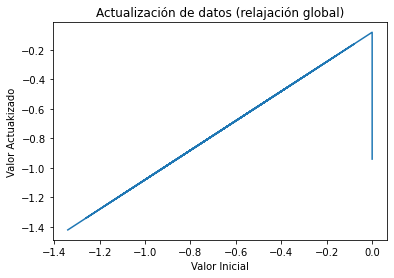

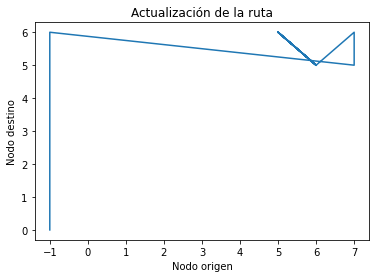




 Grafo 3 


Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  31
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[  0.  inf  -1.   0.]
 [  0.  inf  -1.   1.]
 [  0.  inf  -1.   2.]
 [  0.  inf  -1.   3.]
 [  0.  inf  -1.   4.]
 [  0.  inf  -1.   5.]
 [  0.  inf  -1.   6.]
 [  0.  inf  -1.   7.]
 [  0.  inf  -1.   8.]
 [  0.  inf  -1.   9.]
 [-50.   0.  10.   7.]
 [-15.   0.  10.   2.]
 [-60.   0.  10.   8.]
 [ -5.   0.  10.   3.]
 [-20. -15.   3.   2.]
 [-10.  -5.   2.   3.]
 [-25. -20.   3.   2.]
 [-15. -10.   2.   3.]
 [-30. -25.   3.   2.]
 [-20. -15.   2.   3.]
 [-35. -30.   3.   2.]
 [-25. -20.   2.   3.]
 [-40. -35.   3.   2.]
 [-30. -25.   2.   3.]
 [-45. -40.   3.   2.]
 [-35. -30.   2.   3.]
 [-50. -45.   3.   2.]
 [-40. -35.   2.   3.]
 [-55. -50.   3.   2.]
 [-45. -40.   2.   3.]
 [-60. -55.   3.   2.]] 




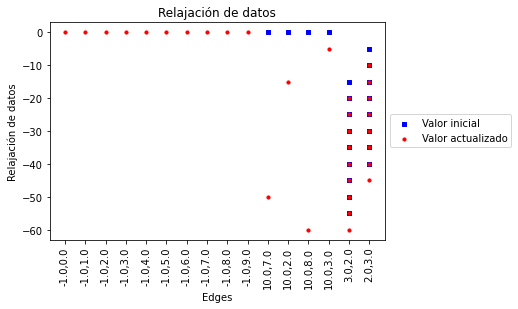

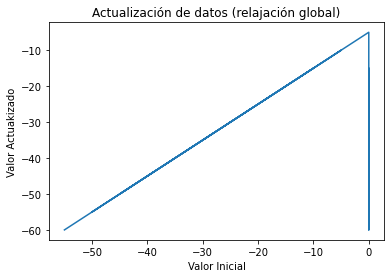

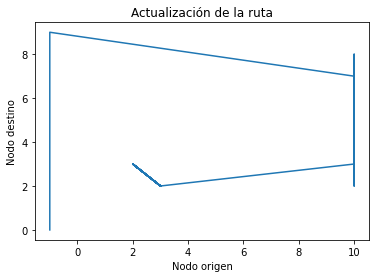

In [9]:
print('\n\n\n Grafo 1 \n\n')
time1 = get_data_sol_seg_param(G1)
print('\n\n\n Grafo 2 \n\n')
time2 = get_data_sol_seg_param(G2)
print('\n\n\n Grafo 3 \n\n')
time3 = get_data_sol_seg_param(G3)

[4, 7, 13]


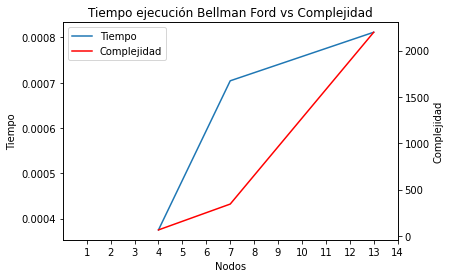

In [16]:
# Se compara el tiempo de ejecución del método de bellman ford y su complejidad de cada grafo, usando en el eje x su número de nodos:
edges_number = np.array([G1.number_of_edges(),G2.number_of_edges(),G3.number_of_edges()])
times =  np.array([time1, time2, time3])
complex_g = np.array([G1.number_of_edges()**3,G2.number_of_edges()**3,G3.number_of_edges()**3])
compare_complex(edges_number.tolist(),complex_g, times)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  16
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[  3.  inf  -1.   1.]
 [  1.  inf  -1.   2.]
 [  7.  inf  -1.   3.]
 [ -2.   3.   0.   1.]
 [ -4.   1.   1.   2.]
 [  2.   7.   1.   3.]
 [ -7.  -2.   2.   1.]
 [ -9.  -4.   1.   2.]
 [ -3.   2.   1.   3.]
 [-12.  -7.   2.   1.]
 [-14.  -9.   1.   2.]
 [ -8.  -3.   1.   3.]
 [-17. -12.   2.   1.]
 [-19. -14.   1.   2.]
 [-13.  -8.   1.   3.]
 [-22. -17.   2.   1.]] 




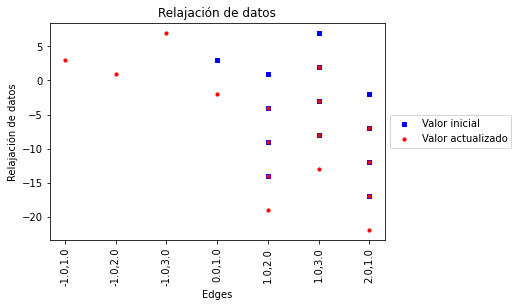

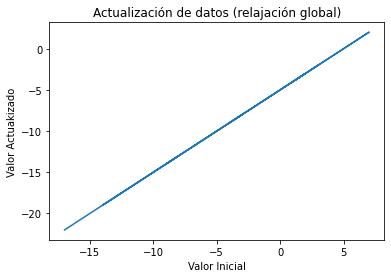

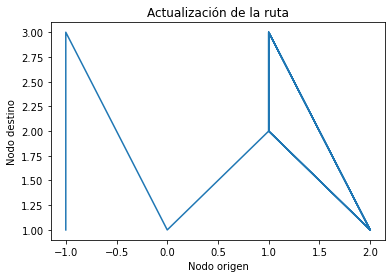

0.00036263465881347656

In [17]:
print('\n\n\n Grafo 1 \n\n')
print('Variación nodo inicial en nodo 0, Grafo1 \n\n')
get_data_sol_seg_param(G1,0)

print('\n\n Variación nodo inicial en nodo 1, Grafo1 \n\n')
get_data_sol_seg_param(G1,1)

print('\n\nVariación nodo inicial en nodo 2, Grafo1 \n\n')
get_data_sol_seg_param(G1,2)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1. -1. -1. -1. -1.  6.  5. -1.] 


Relajaciones, número de iteraciones:  16
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.86   inf -1.    6.  ]
 [-0.08  0.   -1.    5.  ]
 [ 0.78  0.86  5.    6.  ]
 [-0.16 -0.08  6.    5.  ]
 [ 0.7   0.78  5.    6.  ]
 [-0.24 -0.16  6.    5.  ]
 [ 0.62  0.7   5.    6.  ]
 [-0.32 -0.24  6.    5.  ]
 [ 0.54  0.62  5.    6.  ]
 [-0.4  -0.32  6.    5.  ]
 [ 0.46  0.54  5.    6.  ]
 [-0.48 -0.4   6.    5.  ]
 [ 0.38  0.46  5.    6.  ]
 [-0.56 -0.48  6.    5.  ]
 [ 0.3   0.38  5.    6.  ]
 [-0.64 -0.56  6.    5.  ]] 




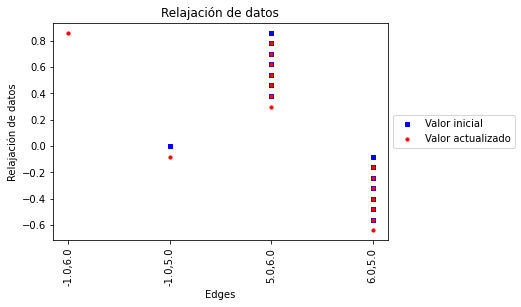

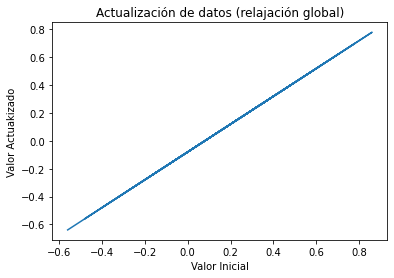

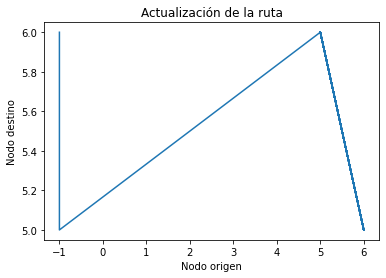

0.0004067420959472656

In [20]:
print('\n\n\n Grafo 2 \n\n')
print('Variación nodo inicial en nodo 5, Grafo2 \n\n')
get_data_sol_seg_param(G2,5)

print('\n\n Variación nodo inicial en nodo 6, Grafo2 \n\n')
get_data_sol_seg_param(G2,6)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [-1.  0.  3.  2.  2.  1.  5.  6.  7.  4. -1.] 


Relajaciones, número de iteraciones:  37
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[  5.  inf  -1.   1.]
 [ 25.  inf  -1.   2.]
 [ 35.  inf  -1.   5.]
 [ 65.  inf  -1.   6.]
 [ 35.  inf  -1.   3.]
 [100.  inf  -1.   4.]
 [ 60. 100.   2.   4.]
 [ 40.  65.   1.   6.]
 [ 85.  inf  -1.   8.]
 [-10.  inf  -1.   7.]
 [ 20.  25.   1.   2.]
 [160.  inf  -1.   9.]
 [-20.  85.   5.   8.]
 [ 30.  35.   2.   3.]
 [ 15.  20.   3.   2.]
 [ 25.  30.   2.   3.]
 [ 10.  15.   3.   2.]
 [ 20.  25.   2.   3.]
 [  5.  10.   3.   2.]
 [ 15.  20.   2.   3.]
 [  0.   5.   3.   2.]
 [ 10.  15.   2.   3.]
 [ -5.   0.   3.   2.]
 [  5.  10.   2.   3.]
 [-10.  -5.   3.   2.]
 [  0.   5.   2.   3.]
 [-15. -10.   3.   2.]
 [ -5.   0.   2.   3.]
 [-20. -15.   3.   2.]
 [-10.  -5.   2.   3.]
 [ 55.  60.   5.   4.]
 [-25. -20.   3.   2.]
 [155. 160.   4.   9.]
 [-15. -10.   2.

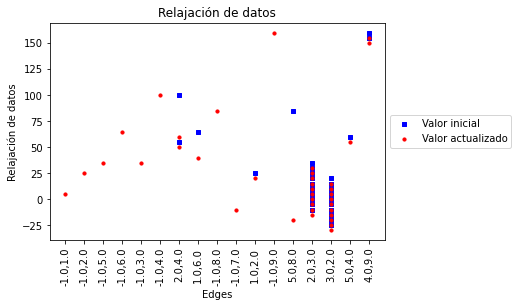

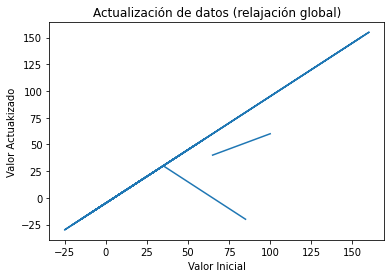

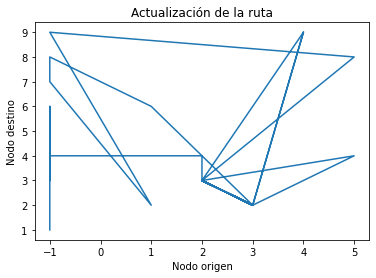

0.0005054473876953125

In [22]:
print('\n\n\n Grafo 3 \n\n')
print('Variación nodo inicial en nodo 0, Grafo3 \n\n')
get_data_sol_seg_param(G3,0)

print('\n\n Variación nodo inicial en nodo 2, Grafo3 \n\n')
get_data_sol_seg_param(G3,2)

print('\n\n VVariación nodo inicial en nodo 3, Grafo3 \n\n')
get_data_sol_seg_param(G3,3)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 4.  2.  1.  1. -1.] 


Relajaciones, número de iteraciones:  15
Solución:  [2, 1, 2]
Relajaciones realizadas: 

 [[ -1.   1.  -1.   2.]
 [ -4.   1.  -1.   1.]
 [  0.   1.  -1.   0.]
 [  0.   1.  -1.   3.]
 [ -6.  -1.   1.   2.]
 [ -9.  -4.   2.   1.]
 [-11.  -6.   1.   2.]
 [ -5.   0.   4.   3.]
 [-14.  -9.   2.   1.]
 [-16. -11.   1.   2.]
 [-10.  -5.   1.   3.]
 [-19. -14.   2.   1.]
 [-21. -16.   1.   2.]
 [-15. -10.   1.   3.]
 [-24. -19.   2.   1.]] 




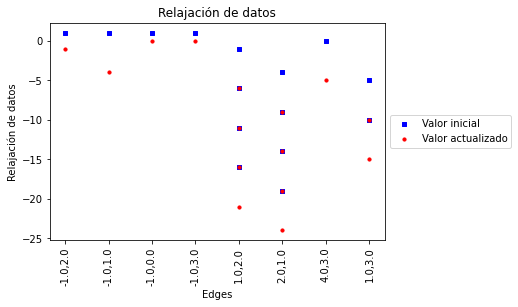

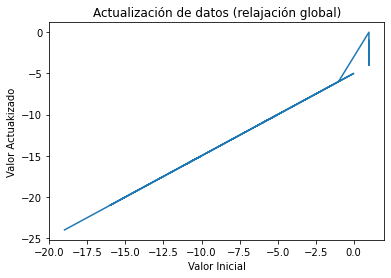

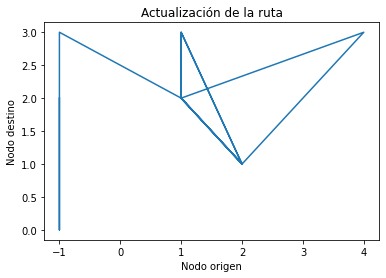

0.00021600723266601562

In [25]:
print('\n\n\n Grafo 1 \n\n')
print('Variación de Distancia 1, Grafo 1 \n\n')
get_data_sol_seg_param(G1,None,1)

print('\n\n Variación de Distancia 100, Grafo 1 \n\n')
get_data_sol_seg_param(G1,None,100)

print('\n\n Variación de Distancia 1000, Grafo 1 \n\n')
get_data_sol_seg_param(G1,None,1000)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [ 7.  7.  7.  7.  7.  6.  5. -1.] 


Relajaciones, número de iteraciones:  21
Solución:  [5, 6, 5]
Relajaciones realizadas: 

 [[ 0.06  1.   -1.    5.  ]
 [ 0.    1.   -1.    0.  ]
 [ 0.    1.   -1.    1.  ]
 [ 0.    1.   -1.    2.  ]
 [ 0.    1.   -1.    3.  ]
 [ 0.    1.   -1.    4.  ]
 [ 0.    0.06  6.    5.  ]
 [ 0.    1.   -1.    6.  ]
 [-0.94  0.    7.    5.  ]
 [-0.08  0.    7.    6.  ]
 [-1.02 -0.94  6.    5.  ]
 [-0.16 -0.08  5.    6.  ]
 [-1.1  -1.02  6.    5.  ]
 [-0.24 -0.16  5.    6.  ]
 [-1.18 -1.1   6.    5.  ]
 [-0.32 -0.24  5.    6.  ]
 [-1.26 -1.18  6.    5.  ]
 [-0.4  -0.32  5.    6.  ]
 [-1.34 -1.26  6.    5.  ]
 [-0.48 -0.4   5.    6.  ]
 [-1.42 -1.34  6.    5.  ]] 




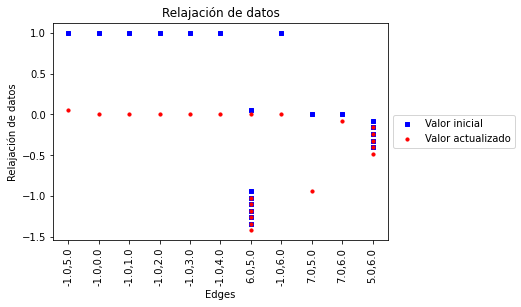

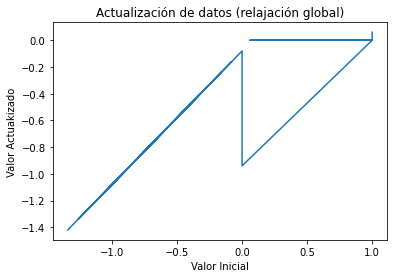

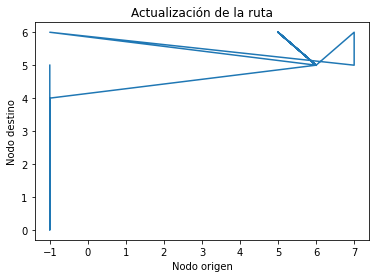

0.0006189346313476562

In [28]:
print('\n\n\n Grafo 2 \n\n')
print('Variación de Distancia 1, Grafo 2 \n\n')
get_data_sol_seg_param(G2,None,1)

print('\n\n Variación de Distancia 100, Grafo 2 \n\n')
get_data_sol_seg_param(G2,None,100)

print('\n\n Variación de Distancia 1000, Grafo 2 \n\n')
get_data_sol_seg_param(G2,None,1000)

Creación del Mapa de predecesores que contiene los nodos del mínimo spanning tree: 

 [10. 10.  3.  2. 10. 10. 10.  6.  7. 10. -1.] 


Relajaciones, número de iteraciones:  32
Solución:  [3, 2, 3]
Relajaciones realizadas: 

 [[-49.   1.  -1.   7.]
 [-14.   1.  -1.   2.]
 [-59.   1.  -1.   8.]
 [  0.   1.  -1.   0.]
 [  0.   1.  -1.   1.]
 [  0.   1.  -1.   3.]
 [  0.   1.  -1.   4.]
 [  0.   1.  -1.   5.]
 [  0.   1.  -1.   6.]
 [  0.   1.  -1.   9.]
 [ -4.   0.  10.   3.]
 [-50. -49.   6.   7.]
 [-19. -14.   3.   2.]
 [-60. -59.   7.   8.]
 [ -9.  -4.   2.   3.]
 [-24. -19.   3.   2.]
 [-14.  -9.   2.   3.]
 [-29. -24.   3.   2.]
 [-19. -14.   2.   3.]
 [-34. -29.   3.   2.]
 [-24. -19.   2.   3.]
 [-39. -34.   3.   2.]
 [-29. -24.   2.   3.]
 [-44. -39.   3.   2.]
 [-34. -29.   2.   3.]
 [-49. -44.   3.   2.]
 [-39. -34.   2.   3.]
 [-54. -49.   3.   2.]
 [-44. -39.   2.   3.]
 [-59. -54.   3.   2.]
 [-49. -44.   2.   3.]
 [-64. -59.   3.   2.]] 




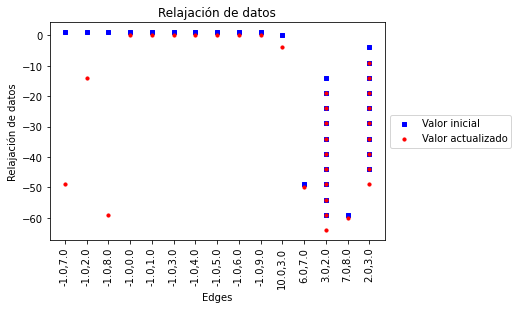

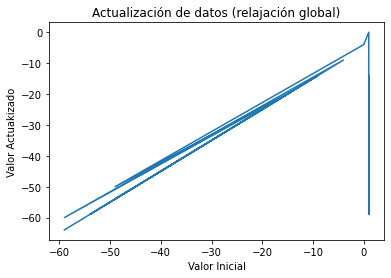

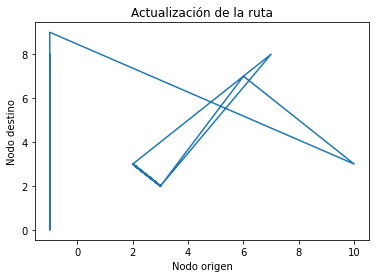

0.0006670951843261719

In [31]:
print('\n\n\n Grafo 3 \n\n')
print('Variación de Distancia 1, Grafo 3 \n\n')
get_data_sol_seg_param(G3,None,1)

print('\n\n Variación de Distancia 100, Grafo 3 \n\n')
get_data_sol_seg_param(G3,None,100)

print('\n\n Variación de Distancia 1000, Grafo 3 \n\n')
get_data_sol_seg_param(G3,None,1000)